In [58]:
#import qiskit tools
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise

#import python stuff
import matplotlib.pyplot as plt
import numpy as np
import time

# Set backend device, choose to use a simulator
sim = Aer.get_backend('aer_simulator')

# build circuit
qc = QuantumCircuit(1,1)
qc.x(0)
qc.measure(0,0)

# show circuit
qc.draw()



┌───┐┌─┐
q: ┤ X ├┤M├
   └───┘└╥┘
c: ══════╩═

In [59]:
# run the test
num_of_shots = 1000
test = sim.run(qc, shots=num_of_shots)
results = test.result()
counts = results.get_counts(qc)

In [60]:
# print counts
counts['0']=0
print(counts)

{'1': 1000, '0': 0}


In [61]:
# use snspd data
real_counts ={}
real_counts['1'] = counts['1']*0.81 + counts['0']*0.027
real_counts['0'] = counts['1']*0.0035+ counts['0']*0.78
print(real_counts)

{'1': 810.0, '0': 3.5}


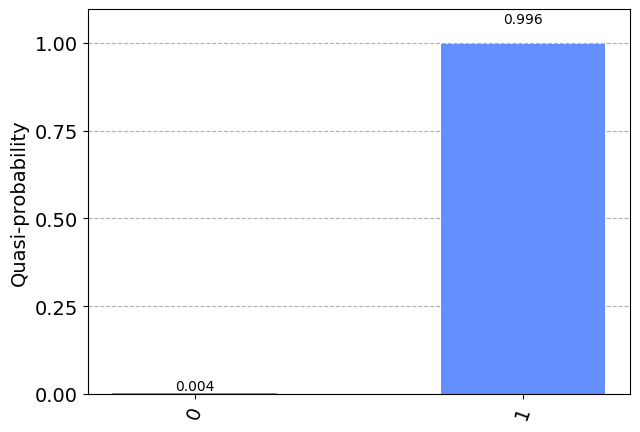

In [62]:
# plot the real counts
plot_histogram(real_counts)